✅ Project Goal Build an image classification model (cats vs. dogs) using:

PyTorch

TensorFlow ✅

Data Preparation
Use tensorflow.keras.preprocessing

Resize, normalize

Split into train/test (or train/val/test) using sklearn. model_selection.train_test_split

Model Definition
Build a CNN

Or use transfer learning (ResNet or MobileNet)

Training Loop
Track accuracy and loss using Matplotlib

Save best model weights

Evaluation
Confusion matrix

Accuracy, precision, recall using sklearn.metrics

Visualization
Sample predictions

Learning curves

Dataset Using Kaggle's Dogs vs. Cats dataset:
Kaggle Dataset Link: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats

In [ ]:
from google.colab import files
files.upload()

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d biaiscience/dogs-vs-cats
!unzip -q dogs-vs-cats.zip -d data

Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
 97% 789M/817M [00:05<00:00, 84.0MB/s]
100% 817M/817M [00:05<00:00, 163MB/s] 


In [4]:
import os

# Replace 'path/to/your/unzipped_folder' with the actual path
FOLDER_PATH = 'dogs-vs-cats.zip'  # Example for a folder in /content

try:
    item_count = len(os.listdir(FOLDER_PATH))
    print(f"Number of items in the folder '{FOLDER_PATH}': {item_count}")
except FileNotFoundError:
    print(f"Error: The folder '{FOLDER_PATH}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: [Errno 20] Not a directory: 'dogs-vs-cats.zip'


In [5]:
import os
import shutil

source_dir = "data/train/train"
target_base = "data/train/sorted"

os.makedirs(f"{target_base}/cat", exist_ok=True)
os.makedirs(f"{target_base}/dog", exist_ok=True)

for filename in os.listdir(source_dir):
    if filename.startswith("cat"):
        shutil.copy(os.path.join(source_dir, filename), os.path.join(target_base, "cat", filename))
    elif filename.startswith("dog"):
        shutil.copy(os.path.join(source_dir, filename), os.path.join(target_base, "dog", filename))

print("Images sorted into forlder")


Images sorted into forlder


In [6]:
import os

cat_files = len(os.listdir("data/train/sorted/cat"))
dog_files = len(os.listdir("data/train/sorted/dog"))

print(f" Images in 'cat/': {cat_files}")
print(f" Images in 'dog/': {dog_files}")

 Images in 'cat/': 12500
 Images in 'dog/': 12500


In [7]:
import os

for root, dirs, files in os.walk("data"):
    print(root)
    for d in dirs:
        print("   Floder", d)

data
   Floder train
   Floder test
data/train
   Floder train
   Floder sorted
data/train/train
data/train/sorted
   Floder cat
   Floder dog
data/train/sorted/cat
data/train/sorted/dog
data/test
   Floder test
data/test/test


becuse the issre we had with not sepreted in folders dog & cat we did it manual

## Import Libraries

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
image_size = (128, 128)
batch_size = 32

train_ds = image_dataset_from_directory(
    "data/train/sorted",
    validation_split = .2,
    subset = 'training',
    seed = 50,
    image_size = image_size,
    batch_size = batch_size
)

val_ds = image_dataset_from_directory(
    "data/train/sorted",
    validation_split= .2,
    subset= 'validation',
    seed = 50,
    image_size = image_size,
    batch_size = batch_size
)

print(f"Class Names: {train_ds.class_names}")

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Class Names: ['cat', 'dog']


fully set up:

✅ 25,000 images detected

✅ Correctly split into 20,000 training and 5,000 validation

✅ Classes identified as ['cat', 'dog']

Define a CNN Model from Scratch (TensorFlow)

In [35]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')  # 2 output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 903s 1s/step - accuracy: 0.5972 - loss: 6.1110 - val_accuracy: 0.7076 - val_loss: 0.5650
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 880s 1s/step - accuracy: 0.7352 - loss: 0.5343 - val_accuracy: 0.7462 - val_loss: 0.5221
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 858s 1s/step - accuracy: 0.7893 - loss: 0.4446 - val_accuracy: 0.7684 - val_loss: 0.5009
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 896s 1s/step - accuracy: 0.8469 - loss: 0.3507 - val_accuracy: 0.7638 - val_loss: 0.5246
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 919s 1s/step - accuracy: 0.8824 - loss: 0.2701 - val_accuracy: 0.7874 - val_loss: 0.5224
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 910s 1s/step - accuracy: 0.9235 - loss: 0.1983 - val_accuracy: 0.7510 - val_loss: 0.6543
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 933s 1s/step - accuracy: 0.9438 - loss: 0.1478 - val_accuracy: 0.7694 - val_loss: 0.6820
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 896s 1s/step - accuracy: 0.9607 - loss: 0.1087 - val_accu

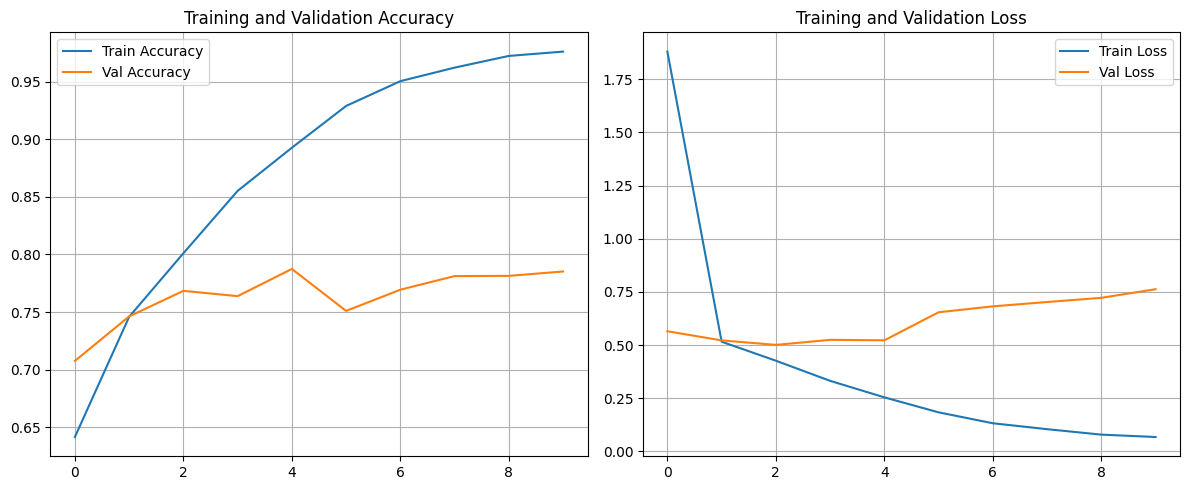

In [39]:
# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
y_true = []
y_pred = []
class_names = train_ds.class_names
for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=class_names))

✅ Training Accuracy
Climbs steadily to ~97% — your model is learning very well

⚠️ Validation Accuracy
Stalls around 75% to 79%

Starts diverging from training accuracy after a few epochs
* Classic sign of overfitting

* model summary
1. Memorizing the training set (high train accuracy, low loss)

2. Not generalizing well to unseen validation data (stagnant val accuracy)

Two way to prevent overfitting
1. Add Data Augmentation
2. Train for Fewer Epochs
3. Use Dropout or L2 Regulariztion
4. Try Transfor Learning if not getting better Mode
## NOTE: In the case we want to try CNN

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

Model-1 with augmentation and Dropout L2 applied

In [11]:
from tensorflow.keras import layers, models

model_1 = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    # kernel_regularizer
    layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # increase dropout to 0.4
    layers.Dropout(0.4),
    layers.Dense(2, activation='softmax')  # 2 output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
history_1 = model_1.fit(
    train_ds,
    validation_data=val_ds,
    # goal is 5 or 6 epochs
    epochs= 5
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.5804 - loss: 13.4734 - val_accuracy: 0.6666 - val_loss: 4.4460
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 51ms/step - accuracy: 0.6741 - loss: 4.1058 - val_accuracy: 0.7160 - val_loss: 3.2519
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.7070 - loss: 3.0702 - val_accuracy: 0.7510 - val_loss: 2.5264
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.7250 - loss: 2.4208 - val_accuracy: 0.7418 - val_loss: 2.0416
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7412 - loss: 1.9580 - val_accuracy: 0.7580 - val_loss: 1.6535


The first model (model) used "cpu" and sconde model (model_1) with "gpu"

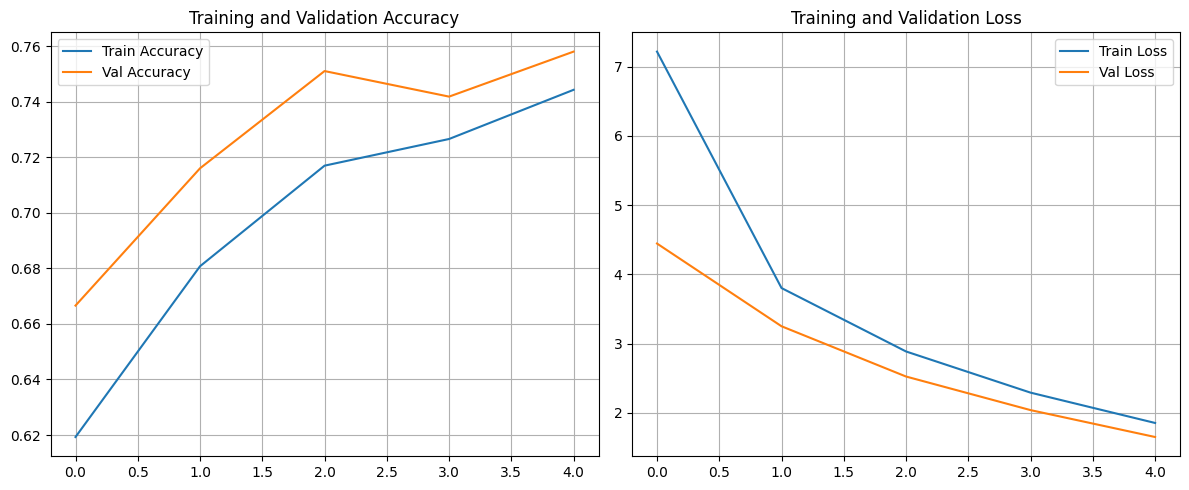

In [14]:
# Plot training & validation accuracy and loss
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Evaluate model_1
which has better result with less overfitting


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
class_names = train_ds.class_names
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model_1.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Conver to arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification report
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

Sample Predicctions

In [17]:
import matplotlib.pyplot as plt

def show_predictions(model, dataset, class_names, num_images=6):
    plt.figure(figsize=(12, 6))
    count = 0

    for images, labels in dataset:
        preds = model.predict(images)
        preds = tf.argmax(preds, axis=1)

        for i in range(images.shape[0]):
            if count == num_images:
                break
            plt.subplot(2, 3, count + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            true_label = class_names[labels[i]]
            pred_label = class_names[preds[i]]
            plt.title(f"True: {true_label} | Pred: {pred_label}")
            plt.axis("off")
            count += 1
        if count == num_images:
            break
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


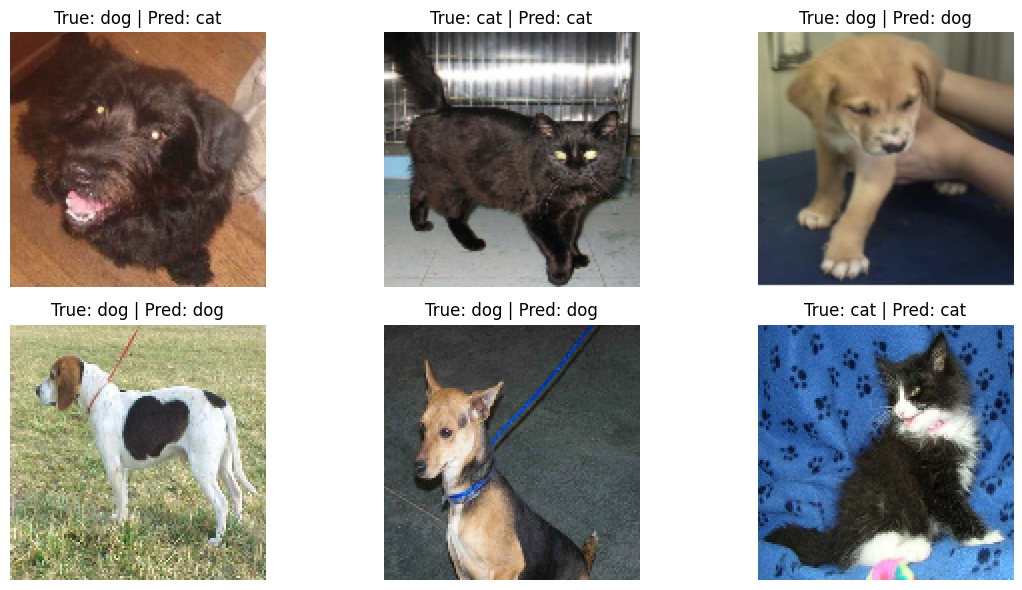

In [18]:
show_predictions(model_1, val_ds, class_names)

Saved the trained model

In [19]:
# # Save full model (architecture + weight + optimizer state)
# model_1.save("tensorflow_model/saved_model")

# # Optionally save in hdf5
# model_1.save("tensorflow_model/model.h5")

Load

In [20]:
# from tensorflow.keras.models import load_model

# # Load full model
# model_loaded = load_model("tensorflow_model/saved_model")

# # Use it like before:
# model_loaded.evaluate(val_ds)